# Customrer Lifetime Value Prediction

## Required Libraries 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt 
import warnings 

## Importing the csv file i.e the dataset is stored as a dataframe

In [2]:
df=pd.read_csv('C:\\Users\\Kaushik\\OneDrive\\Ivy Data Science Notes\\R and Stats\\R Main Project\\Cust val anal.csv')

In [3]:
df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,Employment_Status,Gender,Income,...,Months_Since_Policy_Inception,Type_of_Open_Complaints,Type_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02-03-2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Dropping Unwanted Columns

In [4]:
df=df.drop(columns=['Customer','Effective_To_Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer_Lifetime_Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Employment_Status              9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location_Code                  9134 non-null   object 
 9   Marital_Status                 9134 non-null   object 
 10  Monthly_Premium_Auto           9134 non-null   int64  
 11  Months_Since_Last_Claim        9134 non-null   int64  
 12  Months_Since_Policy_Inception  9134 non-null   i

In [6]:
df.dtypes

State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
Employment_Status                 object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Type_of_Open_Complaints            int64
Type_of_Policies                   int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
dtype: object

In [7]:
df.shape

(9134, 22)

In [8]:
df.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Type_of_Open_Complaints,Type_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer_Lifetime_Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Employment_Status              9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location_Code                  9134 non-null   object 
 9   Marital_Status                 9134 non-null   object 
 10  Monthly_Premium_Auto           9134 non-null   int64  
 11  Months_Since_Last_Claim        9134 non-null   int64  
 12  Months_Since_Policy_Inception  9134 non-null   i

## Checking for NULL Values 

In [10]:
df.isnull().sum()

State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Employment_Status                0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Type_of_Open_Complaints          0
Type_of_Policies                 0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

No null values

## Checking datatypes

In [11]:
df.dtypes

State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
Employment_Status                 object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Type_of_Open_Complaints            int64
Type_of_Policies                   int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
dtype: object

## Outlier Detection
We can detect outliers by plotting histograms

array([[<AxesSubplot:title={'center':'Customer_Lifetime_Value'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Monthly_Premium_Auto'}>,
        <AxesSubplot:title={'center':'Months_Since_Last_Claim'}>],
       [<AxesSubplot:title={'center':'Months_Since_Policy_Inception'}>,
        <AxesSubplot:>]], dtype=object)

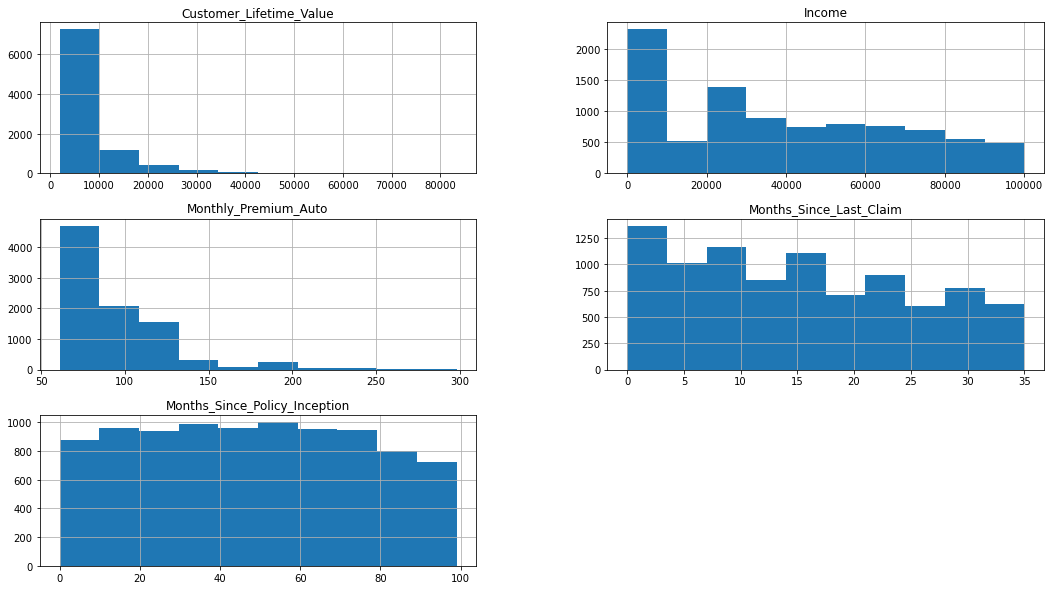

In [12]:
df.hist(['Customer_Lifetime_Value','Income','Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception'],figsize=(18,10))

## Treating Outliers

In [13]:
df['Monthly_Premium_Auto'][df['Monthly_Premium_Auto']<250].sort_values()

4885     61
1875     61
7862     61
6906     61
6907     61
       ... 
8943    247
1300    248
2895    249
7835    249
2294    249
Name: Monthly_Premium_Auto, Length: 9086, dtype: int64

In [14]:
df['Monthly_Premium_Auto'][df['Monthly_Premium_Auto']>250]=250

<ipython-input-14-b402c04f0a0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monthly_Premium_Auto'][df['Monthly_Premium_Auto']>250]=250


# Doing the staistical tests for identifying predictors

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

In [15]:
df.columns

Index(['State', 'Customer_Lifetime_Value', 'Response', 'Coverage', 'Education',
       'Employment_Status', 'Gender', 'Income', 'Location_Code',
       'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Type_of_Open_Complaints',
       'Type_of_Policies', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

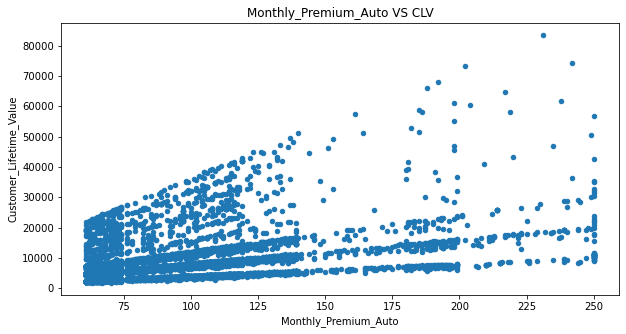

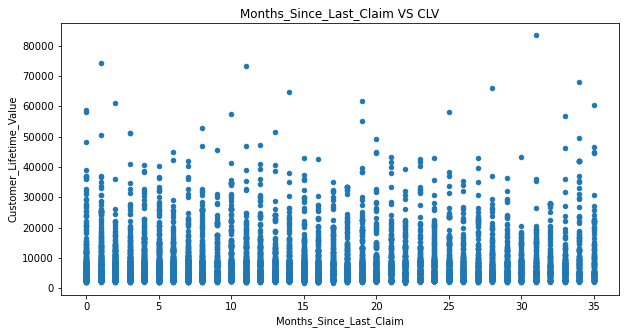

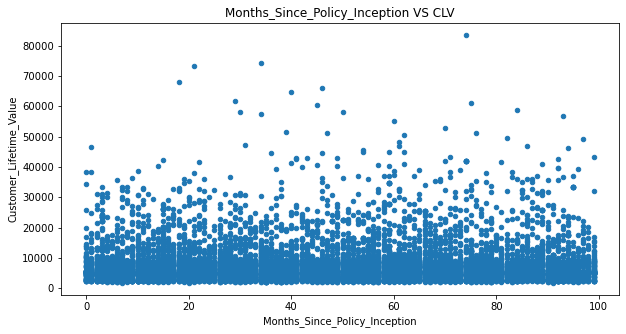

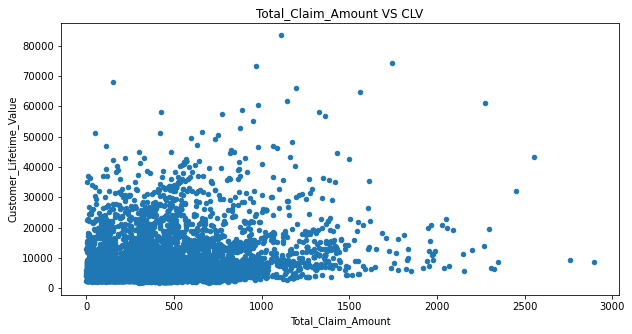

In [16]:
ContinuousCols=['Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception','Total_Claim_Amount']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='Customer_Lifetime_Value', figsize=(10,5), title=predictor+" VS "+ 'CLV')

## Correlation test

As all the variables are continuous, doing the correlation test to find the best predictors is enough. ANOVA test and chi square tests are not applicable for the present dataset

In [17]:
df.columns

Index(['State', 'Customer_Lifetime_Value', 'Response', 'Coverage', 'Education',
       'Employment_Status', 'Gender', 'Income', 'Location_Code',
       'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Type_of_Open_Complaints',
       'Type_of_Policies', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [18]:
# Calculating correlation matrix
ContinuousCols=['Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception','Income','Total_Claim_Amount','Customer_Lifetime_Value']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Income,Total_Claim_Amount,Customer_Lifetime_Value
Monthly_Premium_Auto,1.000000,0.003779,0.019936,-0.017036,0.630387,0.398611
Months_Since_Last_Claim,0.003779,1.000000,-0.042959,-0.026715,0.007563,0.011517
Months_Since_Policy_Inception,0.019936,-0.042959,1.000000,-0.000875,0.003335,0.009418
Income,-0.017036,-0.026715,-0.000875,1.000000,-0.355254,0.024366
Total_Claim_Amount,0.630387,0.007563,0.003335,-0.355254,1.000000,0.226451
Customer_Lifetime_Value,0.398611,0.011517,0.009418,0.024366,0.226451,1.000000


<AxesSubplot:>

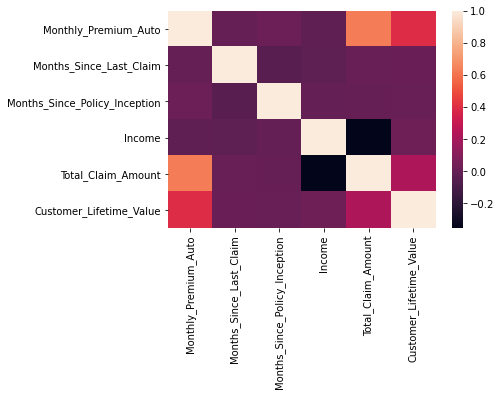

In [19]:
sns.heatmap(CorrelationData)

In [20]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Customer_Lifetime_Value'][abs(CorrelationData['Customer_Lifetime_Value']) > 0.5 ]

Customer_Lifetime_Value    1.0
Name: Customer_Lifetime_Value, dtype: float64

As no column is selected the threshold is reduced to 0.3

In [21]:
# Filtering only those columns where absolute correlation > 0.3 with Target Variable
CorrelationData['Customer_Lifetime_Value'][abs(CorrelationData['Customer_Lifetime_Value']) > 0.3 ]

Monthly_Premium_Auto       0.398611
Customer_Lifetime_Value    1.000000
Name: Customer_Lifetime_Value, dtype: float64

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [22]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [23]:
df.columns

Index(['State', 'Customer_Lifetime_Value', 'Response', 'Coverage', 'Education',
       'Employment_Status', 'Gender', 'Income', 'Location_Code',
       'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Type_of_Open_Complaints',
       'Type_of_Policies', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [24]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['State', 'Response', 'Coverage', 'Education',
       'Employment_Status', 'Gender', 'Location_Code',
       'Marital_Status', 'Type_of_Open_Complaints',
       'Type_of_Policies', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size']
FunctionAnova(inpData=df, 
              TargetVariable='Customer_Lifetime_Value', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

State is NOT correlated with Customer_Lifetime_Value | P-Value: 0.8955985932127517
Response is NOT correlated with Customer_Lifetime_Value | P-Value: 0.39348303047730904
Coverage is correlated with Customer_Lifetime_Value | P-Value: 6.0158970099807e-58
Education is correlated with Customer_Lifetime_Value | P-Value: 0.04603615409468821
Employment_Status is correlated with Customer_Lifetime_Value | P-Value: 0.00425058662383102
Gender is NOT correlated with Customer_Lifetime_Value | P-Value: 0.193398656308463
Location_Code is NOT correlated with Customer_Lifetime_Value | P-Value: 0.8976268526407198
Marital_Status is correlated with Customer_Lifetime_Value | P-Value: 0.036281036735873
Type_of_Open_Complaints is correlated with Customer_Lifetime_Value | P-Value: 0.0004884204153965216
Type_of_Policies is correlated with Customer_Lifetime_Value | P-Value: 0.0
Policy_Type is NOT correlated with Customer_Lifetime_Value | P-Value: 0.11268909882175004
Policy is NOT cor

['Coverage',
 'Education',
 'Employment_Status',
 'Marital_Status',
 'Type_of_Open_Complaints',
 'Type_of_Policies',
 'Renew_Offer_Type',
 'Vehicle_Class']

Hence we can select the columns where absolute correlation > 0.3 with Target Variable


### Best predictors are 
- Coverage
- Education
- Employment_Status
- Marital Status
- Type_of_Open_Complaintsn 
- Type_of_Policies
- Renew_Offer_Type
- Vehicle_Class
- Monthly Premium Auto

## Creating data for Machine Learning  

In [25]:
SelectColumns=['Coverage','Education','Employment_Status','Marital_Status','Type_of_Open_Complaints','Type_of_Policies',
               'Renew_Offer_Type','Vehicle_Class','Monthly_Premium_Auto','Customer_Lifetime_Value']
DataForML=df[SelectColumns]
DataForML.head()


,Coverage,Education,Employment_Status,Marital_Status,Type_of_Open_Complaints,Type_of_Policies,Renew_Offer_Type,Vehicle_Class,Monthly_Premium_Auto,Customer_Lifetime_Value
0,Basic,Bachelor,Employed,Married,0,1,Offer1,Two-Door Car,69,2763.519279
1,Extended,Bachelor,Unemployed,Single,0,8,Offer3,Four-Door Car,94,6979.535903
2,Premium,Bachelor,Employed,Married,0,2,Offer1,Two-Door Car,108,12887.431650
3,Basic,Bachelor,Unemployed,Married,0,7,Offer1,SUV,106,7645.861827
4,Basic,Bachelor,Employed,Single,0,1,Offer1,Four-Door Car,73,2813.692575


In [26]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Categorical Handling 

In [27]:
DataForML['Coverage']=DataForML['Coverage'].replace({'Basic':1,'Extended':2,'Premium':3})
DataForML['Education']=DataForML['Education'].replace({'Bachelor':1,'College':2,'Master':3,'High School or Below':4,'Doctor':5})
DataForML['Employment_Status'] =DataForML['Employment_Status'].replace({'Employed':1,'Unemployed':2,'Medical Leave':3,'Disabled':4,'Retired':5})
DataForML['Marital_Status']=DataForML['Marital_Status'].replace({'Single':1,'Married':2,'Divorced':3})
DataForML['Renew_Offer_Type']=DataForML['Renew_Offer_Type'].replace({'Offer1':1, 'Offer3':3, 'Offer2':2, 'Offer4':4})
DataForML['Vehicle_Class']=DataForML['Vehicle_Class'].replace({'Two-Door Car':1, 'Four-Door Car':2, 'SUV':3,'Luxury SUV':4, 'Sports Car':5, 'Luxury Car':6})


<ipython-input-27-e61e2a92abbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['Coverage']=DataForML['Coverage'].replace({'Basic':1,'Extended':2,'Premium':3})
<ipython-input-27-e61e2a92abbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['Education']=DataForML['Education'].replace({'Bachelor':1,'College':2,'Master':3,'High School or Below':4,'Doctor':5})
<ipython-input-27-e61e2a92abbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

## Machine Learning Splitting the data into 70:30 Ratio

In [28]:
TargetVariable='Customer_Lifetime_Value'
Predictors=['Coverage','Education','Employment_Status','Marital_Status','Type_of_Open_Complaints','Type_of_Policies',
               'Renew_Offer_Type','Vehicle_Class','Monthly_Premium_Auto']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [29]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 9)
(6393,)
(2741, 9)
(2741,)


In [31]:
X_train[0:4]

array([[0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333, 0.4       , 0.36507937],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 1.        , 0.4       , 0.37037037],
       [0.5       , 0.25      , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.8       , 0.41269841],
       [0.5       , 0.25      , 0.25      , 0.        , 0.        ,
        0.875     , 0.33333333, 0.8       , 0.31746032]])

# Multiple Linear Regression

In [32]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Customer_Lifetime_Value']-TestingDataResults['PredictedCustomer_Lifetime_Value']))/TestingDataResults['Customer_Lifetime_Value'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.16541386869891084

##### Model Validation and Accuracy Calculations ##########
   Customer_Lifetime_Value  PredictedCustomer_Lifetime_Value
0              4222.631209                            9427.0
1              5514.344018                            5934.0
2              3808.122147                            8035.0
3              7914.823110                            8672.0
4              7931.722181                            6553.0
Mean Accuracy on test data: 39.4681036891356
Median Accuracy on test data: 67.2327232664671

Accuracy values for 10-fold Cross Validation:
 [39.91992125 39.52249752 41.23678043 39.38056661 43.80528193 41.13409668
 39.30722562 39.6927992  39.62122008 40.8523017 ]

Final Average Accuracy of the model: 40.45


In [33]:
TestingDataResults.head()

,Coverage,Education,Employment_Status,Marital_Status,Type_of_Open_Complaints,Type_of_Policies,Renew_Offer_Type,Vehicle_Class,Monthly_Premium_Auto,Customer_Lifetime_Value,PredictedCustomer_Lifetime_Value,APE
0,0.0,0.75,0.00,0.5,0.0,0.000,0.333333,0.4,0.238095,4222.631209,9427.0,123.249428
1,0.0,0.75,0.00,0.0,0.0,0.375,1.000000,0.0,0.052910,5514.344018,5934.0,7.610261
2,0.5,0.25,0.00,0.5,0.0,0.000,0.333333,0.0,0.174603,3808.122147,8035.0,110.996383
3,0.5,0.25,0.00,0.5,0.2,0.500,0.000000,0.2,0.201058,7914.823110,8672.0,9.566567
4,0.0,0.75,0.75,1.0,0.0,0.125,0.000000,0.2,0.042328,7931.722181,6553.0,17.382381


# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.6096425195962325

##### Model Validation and Accuracy Calculations ##########
   Customer_Lifetime_Value  PredictedCustomer_Lifetime_Value
0              4222.631209                            4002.0
1              5514.344018                            5647.0
2              3808.122147                            4002.0
3              7914.823110                            5647.0
4              7931.722181                           12895.0
Mean Accuracy on test data: 80.64089070628248
Median Accuracy on test data: 87.51892330876598

Accuracy values for 10-fold Cross Validation:
 [80.23227525 80.25140556 81.52334329 80.63449457 79.88248039 79.25577243
 80.5791498  81.31371869 79.55939836 79.8767617 ]

Final Average Accuracy of the model: 80.31


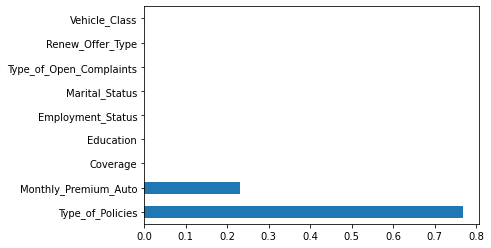

In [34]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Customer_Lifetime_Value']-TestingDataResults['PredictedCustomer_Lifetime_Value']))/TestingDataResults['Customer_Lifetime_Value'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Random Forest

RandomForestRegressor(max_depth=3)
R2 Value: 0.6355673790453852

##### Model Validation and Accuracy Calculations ##########
   Customer_Lifetime_Value  PredictedCustomer_Lifetime_Value
0              4222.631209                            3894.0
1              5514.344018                            5860.0
2              3808.122147                            3824.0
3              7914.823110                            6579.0
4              7931.722181                           12697.0
Mean Accuracy on test data: 82.33267695451292
Median Accuracy on test data: 89.79610793671272

Accuracy values for 10-fold Cross Validation:
 [81.52009953 81.20015471 82.82204468 81.45851607 80.67768925 80.06060305
 81.83245118 82.34526944 80.52418503 80.86184209]

Final Average Accuracy of the model: 81.33


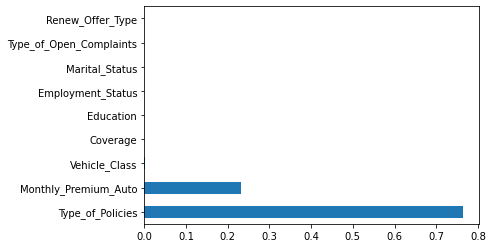

In [35]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=3, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Customer_Lifetime_Value']-TestingDataResults['PredictedCustomer_Lifetime_Value']))/TestingDataResults['Customer_Lifetime_Value'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[11:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.7673173741392851

##### Model Validation and Accuracy Calculations ##########
   Customer_Lifetime_Value  PredictedCustomer_Lifetime_Value
0              4222.63120

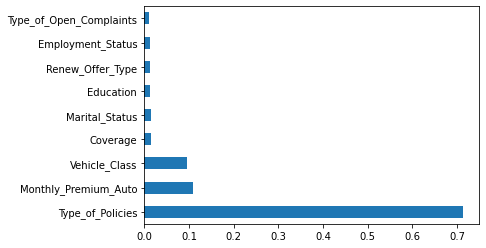

In [36]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Customer_Lifetime_Value']-TestingDataResults['PredictedCustomer_Lifetime_Value']))/TestingDataResults['Customer_Lifetime_Value'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## KNN

In [37]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Customer_Lifetime_Value']-TestingDataResults['PredictedCustomer_Lifetime_Value']))/TestingDataResults['Customer_Lifetime_Value'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.6131571659489272

##### Model Validation and Accuracy Calculations ##########
   Customer_Lifetime_Value  PredictedCustomer_Lifetime_Value
0              4222.631209                            4276.0
1              5514.344018                            8056.0
2              3808.122147                            3808.0
3              7914.823110                            6237.0
4              7931.722181                            6774.0
Mean Accuracy on test data: 63.70858063434043
Median Accuracy on test data: 91.22393791725784

Accuracy values for 10-fold Cross Validation:
 [64.82983139 64.61980264 63.93489595 63.88855509 65.989454   67.4763073
 66.96337863 66.11918486 62.92620557 63.97749275]

Final Average Accuracy of the model: 65.07


# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them. 

<b>XG Boost is chosen due to it's accuracy</b>

In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

In [38]:
DataForML.head()

,Coverage,Education,Employment_Status,Marital_Status,Type_of_Open_Complaints,Type_of_Policies,Renew_Offer_Type,Vehicle_Class,Monthly_Premium_Auto,Customer_Lifetime_Value
0,1,1,1,2,0,1,1,1,69,2763.519279
1,2,1,2,1,0,8,3,2,94,6979.535903
2,3,1,1,2,0,2,1,1,108,12887.431650
3,1,1,2,2,0,7,1,3,106,7645.861827
4,1,1,1,1,0,1,1,2,73,2813.692575


In [39]:
DataForML.columns

Index(['Coverage', 'Education', 'Employment_Status', 'Marital_Status',
       'Type_of_Open_Complaints', 'Type_of_Policies', 'Renew_Offer_Type',
       'Vehicle_Class', 'Monthly_Premium_Auto', 'Customer_Lifetime_Value'],
      dtype='object')

In [40]:
# Separate Target Variable and Predictor Variables
TargetVariable='Customer_Lifetime_Value'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Coverage', 'Education', 'Employment_Status', 'Marital_Status',
       'Type_of_Open_Complaints', 'Type_of_Policies', 'Renew_Offer_Type',
       'Vehicle_Class', 'Monthly_Premium_Auto']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(9134, 9)
(9134,)


#### Cross validating the final model accuracy with less predictors

In [41]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [86.9080872  86.67996656 87.78317216 86.77403827 86.74927987 85.77272569
 87.2394208  88.1057259  86.79426395 86.39126692]

Final Average Accuracy of the model: 86.92


In [42]:
import warnings
warnings.filterwarnings('ignore')

#### Step 1. Retraining the model using 100% data

In [43]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

#### Step 2. Save the model as a serialized file which can be stored anywhere

In [44]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Kaushik\OneDrive\Ivy Data Science Notes\Python Programs\Python CW


#### Step 3. Create a python function

In [45]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
     # Converting the binary nominal variable sex to numeric
    InputData['Coverage'].replace({'Basic':1,'Extended':2,'Premium':3},inplace=True)
    InputData['Education'].replace({'Bachelor':1,'College':2,'Master':3,'High School or Below':4,'Doctor':5},inplace=True)
    InputData['Employment_Status'].replace({'Employed':1,'Unemployed':2,'Medical Leave':3,'Disabled':4,'Retired':5},inplace=True)
    InputData['Marital_Status'].replace({'Single':1,'Married':2,'Divorced':3},inplace=True)
    InputData['Renew_Offer_Type'].replace({'Offer1':1, 'Offer3':3, 'Offer2':2, 'Offer4':4},inplace=True)
    InputData['Vehicle_Class'].replace({'Two-Door Car':1, 'Four-Door Car':2, 'SUV':3,'Luxury SUV':4, 'Sports Car':5, 'Luxury Car':6},inplace=True)
    
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Coverage', 'Education', 'Employment_Status', 'Marital_Status',
       'Type_of_Open_Complaints', 'Type_of_Policies', 'Renew_Offer_Type',
       'Vehicle_Class', 'Monthly_Premium_Auto']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # GenPrice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [46]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[['Basic',1,260,'Four-Door Car'],
     ['Basic',4,302,'SUV']],
columns=['Coverage','Type_of_Policies','Monthly_Premium_Auto','Vehicle_Class'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

  Coverage  Type_of_Policies  Monthly_Premium_Auto  Vehicle_Class
0    Basic                 1                   260  Four-Door Car
1    Basic                 4                   302            SUV


,Prediction
0,11922.0
1,22344.0
